# <span style="color:green"> Tesi</span>

In [2]:
#import evverything needed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

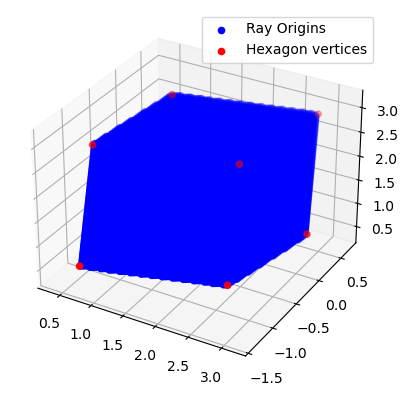

In [5]:
# Load data from the file
data1 = np.loadtxt("data/RayOrigins.dat", delimiter=',')
x1, y1, z1 = data1[:, 0], data1[:, 1], data1[:, 2]

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points

ax.scatter(x1, y1, z1, c='blue', label='Ray Origins')


data2 = np.loadtxt("data/H.dat", delimiter=',')
x2, y2, z2 = data2[:, 0], data2[:, 1], data2[:, 2]

# Scatter plot the new points
ax.scatter(x2, y2, z2, c='red', label='Hexagon vertices')

# Add a legend
ax.legend()

# Show the plot
plt.show()


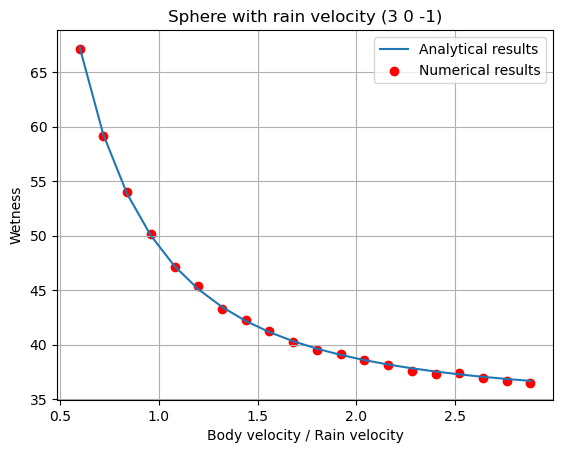

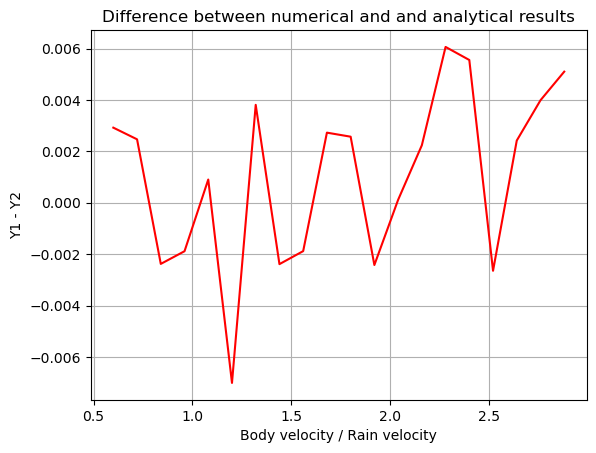

In [4]:
# Read the data from the file
with open("data/CompareSphere.txt", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Plot the data
plt.plot(x_values, y1_values, label='Analytical results')
plt.scatter(x_values, y2_values, color='red', label='Numerical results')

# Add labels and title
plt.xlabel('Body velocity / Rain velocity')
plt.ylabel('Wetness')
plt.title('Sphere with rain velocity (3 0 -1)')
plt.grid(True)

#plt.ylim(0,100)
# Add legend
plt.legend()

# Show the plot
plt.show()

#Calculate the difference between Y1 and Y2
difference = [(y1 - y2)/y1 for y1, y2 in zip(y1_values, y2_values)]

# Plot the difference
plt.plot(x_values, difference, color='red')

# Add labels and title
plt.xlabel('Body velocity / Rain velocity')
plt.ylabel('Y1 - Y2')
plt.title('Difference between numerical and and analytical results')
plt.grid(True)

# Show the plot
plt.show()
